In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns

from seaborn import load_dataset

# Data Manipulation
from sklearn.model_selection import train_test_split

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression

# Evaluating tools
from sklearn.metrics import mean_squared_error

In [2]:
tips = load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
# feature engineering
# 1. convert sex and smoker to values (0, 1) because they are both only have two types of value.
tips.replace(
    {
        'sex': {
            'Male': 0,
            'Female': 1,
        },
        'smoker': {
            'No': 0,
            'Yes': 1,
        }
    },inplace=True
)

# 2. get dummies and concat features
categorical_features = ['day', 'time']
for feature in categorical_features:
    tips = pd.concat([tips, pd.get_dummies(tips[feature], drop_first=True).reset_index(drop=True)], axis=1)
tips.drop(categorical_features, inplace=True, axis=1)

# 3. select features
tips_x = tips[['tip', 'sex', 'smoker', 'size', 'Fri', 'Sat', 'Sun', 'Dinner']]
tips_y = tips.total_bill

In [6]:
x_train, x_test , y_train , y_test = train_test_split(tips_x, tips_y, test_size=0.2, random_state=0)

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [8]:
predictions = lr.predict(x_test)

In [9]:
errors = y_test - predictions
print(f'test-rmse: {mean_squared_error(y_test, predictions)}')

test-rmse: 17.54699709897561


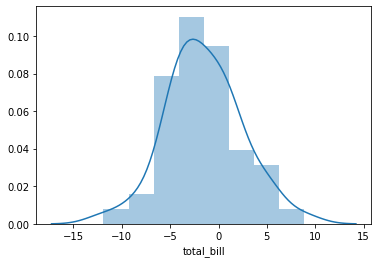

In [10]:
sns.distplot(errors)